## Biblioteca

In [40]:
import pandas as pd
import numpy as np
from scipy import stats

import matplotlib.pyplot as plt
import seaborn as sns

Analizando do menos detalhado para mais detalhado. No caso, Região ou bairro da propriedade é "menos detalhado" do que quantidade de quartos ou banheiros da casa.

Agora que foi feita um primeiro preprocessamento dos dados, vamos levantar algumas hipóteses sobre os dados e tentar responder elas através das análises de dados. Em geral podemos montar tabelas e gráficos para uma melhor visualização dos dados.

Qual a relação das variáveis com o preço das casas?

O vendedor importa na hora de venda ou preço?



In [41]:
df_clean = pd.read_csv('../../data/processed/df_clean.csv')
df_clean.sample(5)

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Regionname,Propertycount
18306,Templestowe,32 Hillhouse Rd,4,h,1200000.00,VB,Purplebricks,28/10/2017,15.50,3106.00,4.00,2.00,2.00,812.00,33.00,1965.01,Manningham City Council,Eastern Metropolitan,6202.00
3576,Heidelberg West,257 Liberty Pde,3,h,507000.00,PI,Nelson,28/05/2016,9.40,3081.00,3.00,1.00,1.00,536.00,155.24,1965.01,Banyule City Council,Eastern Metropolitan,2674.00
24098,Doncaster East,74 Landscape Dr,4,h,1630000.00,S,Barry,24/02/2018,14.30,3109.00,3.11,1.59,1.71,561.80,155.24,1965.01,Manningham City Council,Eastern Metropolitan,10999.00
16058,Brunswick,21/1 Pottery Ct,1,u,347000.00,SP,Walshe,7/10/2017,5.20,3056.00,3.11,1.59,1.71,561.80,155.24,1965.01,Moreland City Council,Northern Metropolitan,11918.00
18989,Yallambie,9 Marigolds Rd,3,h,781000.00,S,Barry,11/11/2017,12.70,3085.00,3.00,2.00,1.00,420.00,154.00,1990.00,Banyule City Council,Northern Metropolitan,1369.00


In [42]:
pd.options.display.float_format = '{:.2f}'.format

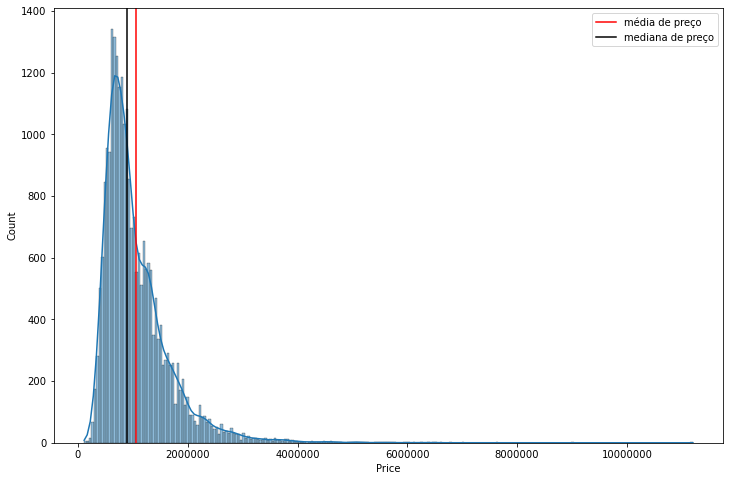

In [43]:
plt.figure(figsize = (12, 8))
sns.histplot(data = df_clean, x = 'Price', kde = True)
plt.ticklabel_format(style = 'plain', axis = 'x')
plt.axvline(df_clean['Price'].mean(), c = 'red', label = 'média de preço')
plt.axvline(df_clean['Price'].median(), c = 'black', label = 'mediana de preço')
plt.legend()
plt.show()

In [44]:
df_clean.loc[:, ['Price']].describe()

,Price
count,24599.00
mean,1062744.69
std,615955.99
min,112000.00
25%,655000.00
50%,895000.00
75%,1300000.00
max,11200000.00


In [45]:
df_clean.loc[:, ['Suburb', 'Price']].groupby('Suburb').mean().sort_values(by = 'Price', ascending = False)

,Price
Suburb,
Malvern,2325607.53
Canterbury,2304727.27
Middle Park,2195081.63
Deepdene,2001785.71
Brighton,1988331.25
...,...
Melton,425086.21
Melton South,423886.36
Bacchus Marsh,423000.00


Bairros mais caros: Canterbury, Middle Park, Malvern e Deepdene

Bairros mais baratos: Darley, Kurunjang, Bacchus, Marsh

Será que são bairros periféricos e outros mais perto de CBD?

In [46]:
df_clean.loc[:, ['Suburb', 'Distance', 'Price']].groupby(['Suburb', 'Distance']).mean().sort_values(by = 'Price', ascending = False)

Price
Suburb        Distance           
Middle Park   3.00     2453000.00
Malvern       7.40     2339822.22
              5.90     2312281.25
Canterbury    8.40     2307763.16
              9.00     2301769.23
...                           ...
Melton        31.70     425086.21
Melton South  29.80     423886.36
Bacchus Marsh 37.50     423000.00
Kurunjang     31.70     380653.85
Darley        37.50     380000.00

[479 rows x 1 columns]

Parece sim ter alguma relação. Vejamos o gráfico a seguir.

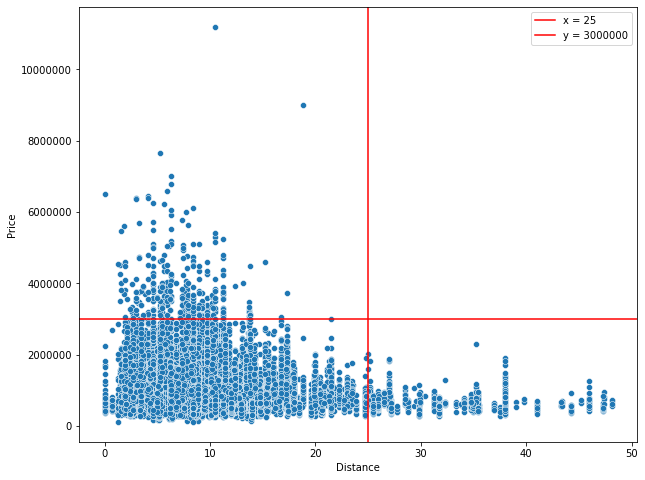

In [47]:
plt.figure(figsize = (10, 8))
sns.scatterplot(x = 'Distance', y = 'Price', data = df_clean)
plt.ticklabel_format(style = 'plain', axis = 'y')
plt.axvline(25, c = 'red', label = 'x = 25')
plt.axhline(3000000, c = 'red', label = 'y = 3000000')
plt.legend()
plt.show()

Olhando o gráfico de dispersão, parece ter uma relação sim, já que os valores acima de 3000000 possuem distância menor que 25. Acima dessa distância, temos preços a baixo disso.

In [48]:
df_clean.loc[:, ['Regionname', 'Price']].groupby(['Regionname']).mean().sort_values(by = 'Price', ascending = False)

,Price
Regionname,
Southern Metropolitan,1454245.91
Eastern Metropolitan,1094550.40
Northern Metropolitan,876990.98
South-Eastern Metropolitan,873593.34
Western Metropolitan,844423.16
Eastern Victoria,696690.67
Northern Victoria,589641.45
Western Victoria,429864.36


In [49]:
df_clean.loc[:, ['Regionname', 'Distance', 'Price']].groupby(['Regionname', 'Distance']).mean().sort_values(by = 'Price', ascending = False)

Price
Regionname            Distance           
Southern Metropolitan 9.00     2301769.23
                      5.90     2247490.38
                      3.00     2140968.25
                      7.40     2112981.13
                      10.50    2001275.79
...                                   ...
Western Metropolitan  27.70     456428.57
Western Victoria      29.80     433462.50
                      31.70     425086.21
Northern Victoria     31.70     422780.49
Western Victoria      37.50     414400.00

[294 rows x 1 columns]

In [50]:
df_clean.loc[:, ['Regionname', 'CouncilArea', 'Price']].groupby(['CouncilArea', 'Regionname']).mean()

Price
CouncilArea                    Regionname                           
Banyule City Council           Eastern Metropolitan       1000634.43
                               Northern Metropolitan       802001.74
Bayside City Council           Southern Metropolitan      1566323.10
Boroondara City Council        Eastern Metropolitan       1514821.88
                               Southern Metropolitan      1693703.58
Brimbank City Council          Western Metropolitan        677856.78
Cardinia Shire Council         Eastern Victoria            559440.00
Casey City Council             Eastern Victoria            779921.05
                               South-Eastern Metropolitan  628627.80
Darebin City Council           Northern Metropolitan       914520.94
Frankston City Council         Eastern Victoria            525860.00
                               South-Eastern Metropolitan  719505.68
Glen Eira City Council         Southern Metropolitan      1166710.00
Greater Dandenong City Council South-Eastern Metropolitan  688317.82
Hobsons Bay City Council       Western Metropolitan       1011765.90
Hume City Council              Northern Metropolitan       591861.87
                               Western Metropolitan        566427.46
Kingston City Council          South-Eastern Metropolitan  950169.26
                               Southern Metropolitan      1002969.34
Knox City Council              Eastern Metropolitan        872514.86
                               South-Eastern Metropolitan  915751.52
Macedon Ranges Shire Council   Northern Victoria           675672.41
Manningham City Council        Eastern Metropolitan       1210268.98
                               Eastern Victoria           1815000.00
Maribyrnong City Council       Western Metropolitan        854752.43
Maroondah City Council         Eastern Metropolitan        895119.35
Melbourne City Council         Northern Metropolitan      1093217.49
                               Southern Metropolitan      1261286.05
Melton City Council            Northern Victoria           422780.49
                               Western Metropolitan        615188.21
                               Western Victoria            430733.15
Mitchell Shire Council         Northern Victoria           519200.00
Monash City Council            Eastern Metropolitan       1323695.86
                               South-Eastern Metropolitan 1125194.48
                               Southern Metropolitan      1123578.66
Moonee Valley City Council     Western Metropolitan       1053991.06
Moorabool Shire Council        Western Victoria            414400.00
Moreland City Council          Northern Metropolitan       873547.04
                               Western Metropolitan        719952.38
Nillumbik Shire Council        Eastern Metropolitan        986818.18
                               Northern Victoria           670046.15
Port Phillip City Council      Southern Metropolitan      1281953.82
Stonnington City Council       Southern Metropolitan      1747770.96
Whitehorse City Council        Eastern Metropolitan       1154295.15
Whittlesea City Council        Northern Metropolitan       621696.00
                               Northern Victoria           489000.00
Wyndham City Council           Western Metropolitan        563285.95
Yarra City Council             Northern Metropolitan      1163965.92
Yarra Ranges Shire Council     Eastern Victoria            750991.78
                               Northern Victoria           665333.33

In [51]:
df_clean.loc[:, ['Type', 'Price']].groupby(['Type']).mean()

,Price
Type,
h,1183314.73
t,930164.08
u,646630.69


In [60]:
df_clean.describe()

,Rooms,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Propertycount
count,24599.00,24599.00,24599.00,24599.00,24599.00,24599.00,24599.00,24599.00,24599.00,24599.00,24599.00
mean,3.03,1062744.69,11.62,3113.76,3.11,1.59,1.71,561.80,155.24,1965.01,7516.22
std,0.88,615955.99,6.79,113.03,0.71,0.54,0.73,434.14,49.33,23.79,4516.86
min,1.00,112000.00,0.00,3000.00,1.00,1.00,0.00,1.00,1.00,1856.00,121.00
25%,2.00,655000.00,6.90,3046.00,3.00,1.00,1.00,450.00,155.24,1965.01,4217.00
50%,3.00,895000.00,10.70,3085.00,3.00,1.59,1.71,561.80,155.24,1965.01,6543.00
75%,4.00,1300000.00,14.30,3152.00,3.11,2.00,2.00,599.00,155.24,1965.01,10331.00
max,12.00,11200000.00,48.10,3978.00,5.00,3.00,4.00,12300.00,1041.00,2019.00,21650.00


In [54]:
df_clean.loc[df_clean['Type'] == 'h', ['Price']].describe()

,Price
count,17642.00
mean,1183314.73
std,652366.20
min,131000.00
25%,741000.00
50%,1006000.00
75%,1430000.00
max,11200000.00


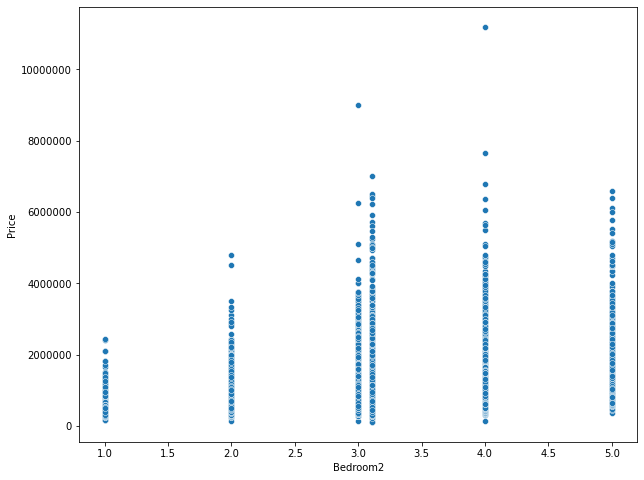

In [61]:
plt.figure(figsize = (10, 8))
sns.scatterplot(x = 'Bedroom2', y = 'Price', data = df_clean)
plt.ticklabel_format(style = 'plain', axis = 'y')
# plt.axvline(25, c = 'red', label = 'x = 25')
# plt.axhline(3000000, c = 'red', label = 'y = 3000000')
# plt.legend()
plt.show()

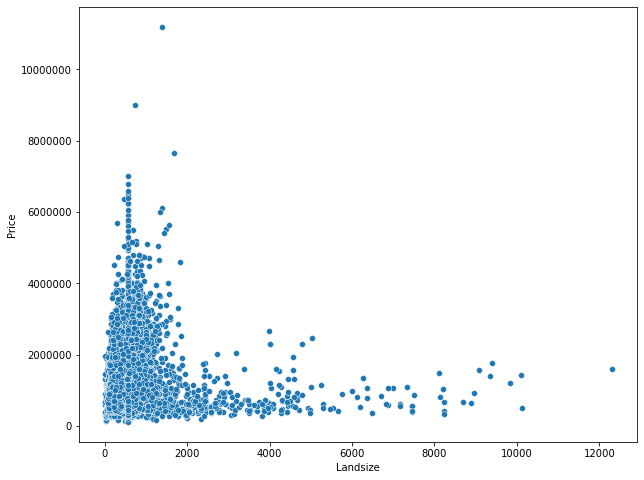

In [56]:
plt.figure(figsize = (10, 8))
sns.scatterplot(x = 'Landsize', y = 'Price', data = df_clean)
plt.ticklabel_format(style = 'plain', axis = 'y')
# plt.axvline(25, c = 'red', label = 'x = 25')
# plt.axhline(3000000, c = 'red', label = 'y = 3000000')
# plt.legend()
plt.show()

In [57]:
def scat_plot(x, y, data):
    sns.regplot(x = x, y = y, data = df_clean, order = 3,
                scatter_kws = {"color": "steelblue"}, line_kws = {"color": "black"})
    plt.ticklabel_format(style = 'plain', axis = 'y')
    plt.title(x)
    plt.show()

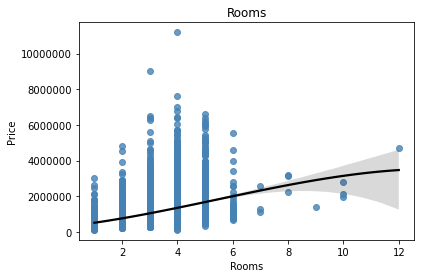

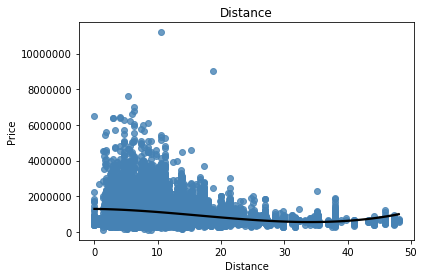

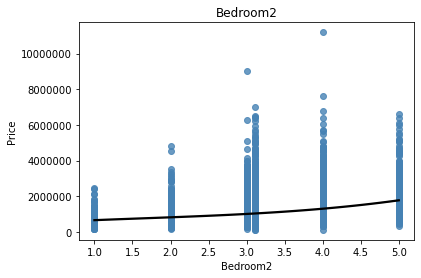

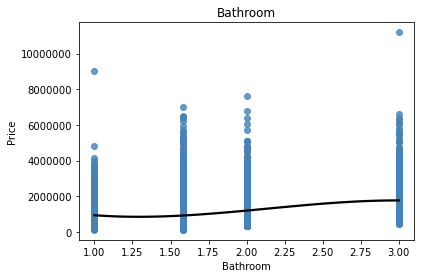

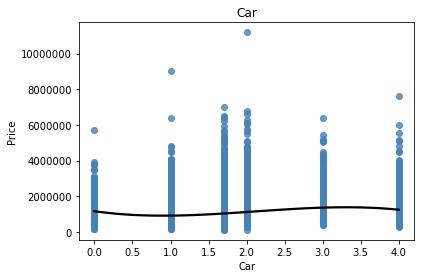

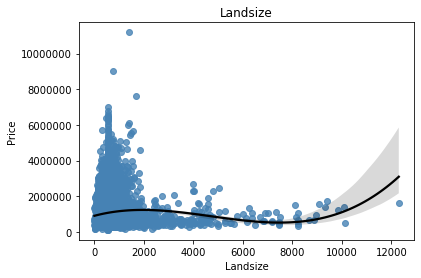

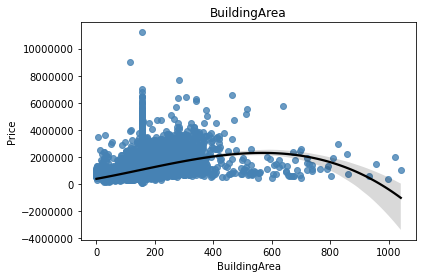

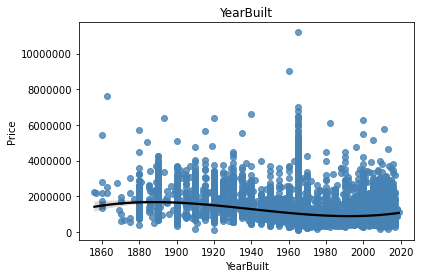

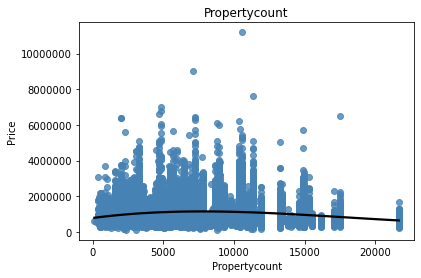

In [58]:
columns = ['Distance', 'Bedroom2', 'Bathroom',  
           'Car', 'YearBuilt', 'Propertycount']

for i in columns:
    scat_plot(i, 'Price', df_clean)

In [59]:
df['Date'] = pd.to_datetime(df['Date'])

NameError: name 'df' is not defined

In [ ]:
ts = df_clean.loc[:, ['Date', 'Price']].groupby('Date').median()

In [ ]:
sns.lineplot(x = 'Date', y = 'Price', data = ts)

plt.ticklabel_format(style = 'plain', axis = 'y')

plt.xticks(rotation = 25)

plt.show()

- Há bairros/regiões em que as propriedades são mais valiosas. Essas regiões costumam ficar mais próximas de CBD de Melbourne. Podemos dizer mais ou menos em regiões centrais mais valiosas do que regiões periféricas;
- 